<a href="https://colab.research.google.com/github/ZIDANIDROS/BelajarDataScience/blob/main/4522210012_husein_zidan_machine_learning_uts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UJIAN TENGAH SEMESTER <br>
Nama : Husein Zidan <br>
NPM  : 4522210012 <br>
Mata Kuliah : Pembelajaran Mesin <br>
Dosen Pengampu : Ninuk Wiliani , S.Si., M.Kom., Phd.

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('Heart_Attack.csv', sep=',')
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


# Data Understanding

In [78]:
# melihat informasi data
print('Info')
df.info()
print('=====================')

# melihat deskripsi data
print('Deskripsi')
df.describe()

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
Deskripsi


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [79]:
# melihat missing value

print("Missing values:\n", df.isnull().sum())

Missing values:
 age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64


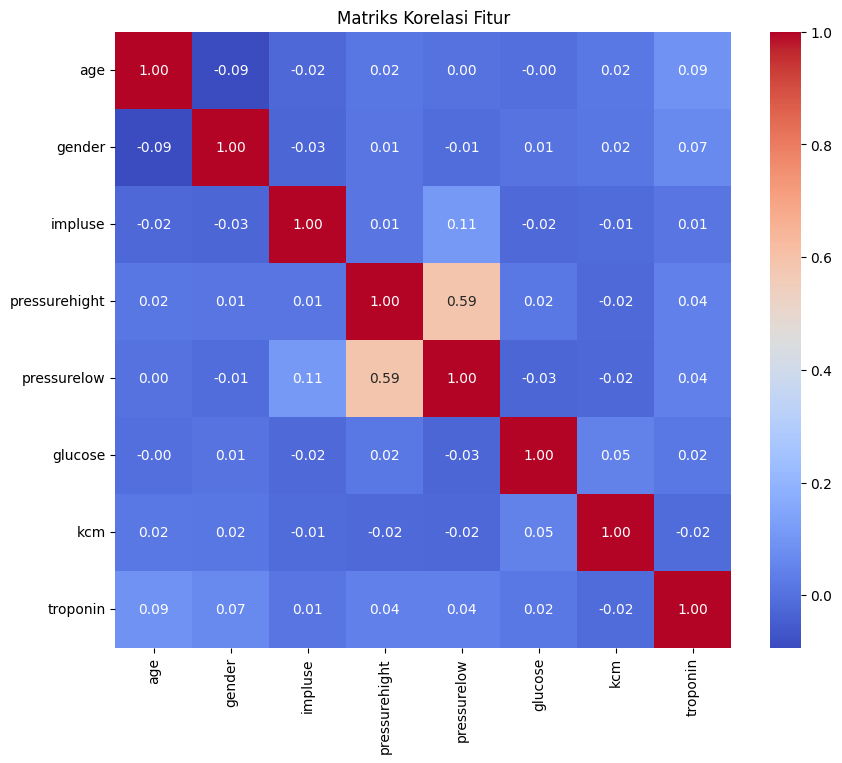

In [80]:
# Membuat Heatmap supaya jelas korelasi anatar atribut

numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriks Korelasi Fitur')
plt.show()

# Cleaning Data

In [81]:
# merubah supaya label menjadi 0(negative) dan 1(positive)

df['class'] = df['class'].map({'negative': 0, 'positive': 1})
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


**PRE-PROCESSING**

In [83]:
from scipy import stats

# Mendefinisikan kolom numerik
numeric_cols = df.columns[:-1]  # Mengambil semua kolom kecuali kolom 'class'

# Menghitung z-score
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Menentukan threshold untuk outlier (misalnya 3)
threshold = 3
outliers = (z_scores > threshold)

# Memisahkan outlier dan inlier
outlier_indices = np.any(outliers, axis=1)
outliers = df[outlier_indices]
inliers = df[~outlier_indices]

In [84]:
print("Outliers:")
outliers

Outliers:


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
7,63,1,60,214,82,87.0,300.000,2.370,1
12,64,1,60,199,99,92.0,3.430,5.370,1
28,47,0,66,134,57,279.0,300.000,0.007,1
29,63,1,66,135,55,166.0,0.493,10.000,0
30,54,1,125,131,82,95.0,1.310,8.300,1
...,...,...,...,...,...,...,...,...,...
1294,50,0,79,92,55,415.0,16.950,0.005,1
1302,40,1,57,208,40,108.0,2.110,0.003,0
1310,70,0,80,135,75,351.0,2.210,10.000,1
1316,45,1,85,168,104,96.0,1.240,4.250,1


In [85]:
print("\nInliers:")
inliers


Inliers:


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1312,48,1,84,118,68,96.0,5.33,0.006,0
1313,86,0,40,179,68,147.0,5.22,0.011,0
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
